In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "../Data/airline_passengers.csv"

In [3]:
df = pd.read_csv(PATH, index_col="Month", parse_dates=True)

In [4]:
df = df.dropna()

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span = 12
alpha = 2/(span+1)

In [10]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [11]:
df.head()

,Thousands of Passengers,EWMA-12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [12]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [13]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [14]:
df['SES-12'] = fitted_model.fittedvalues.shift(-1)

In [15]:
df.head()

,Thousands of Passengers,EWMA-12,SES-12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
df['DES_ADD-12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

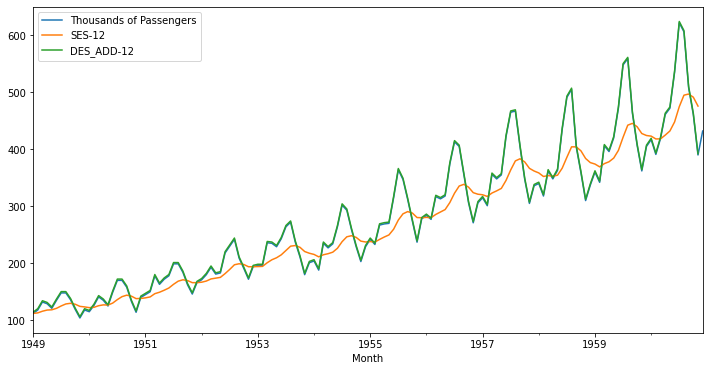

In [18]:
df[['Thousands of Passengers', 'SES-12', 'DES_ADD-12']].plot(figsize=(12,6))

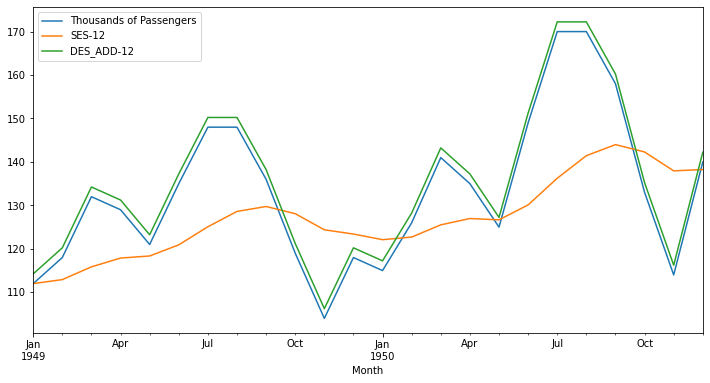

In [19]:
df[['Thousands of Passengers', 'SES-12', 'DES_ADD-12']].iloc[:24].plot(figsize=(12,6))

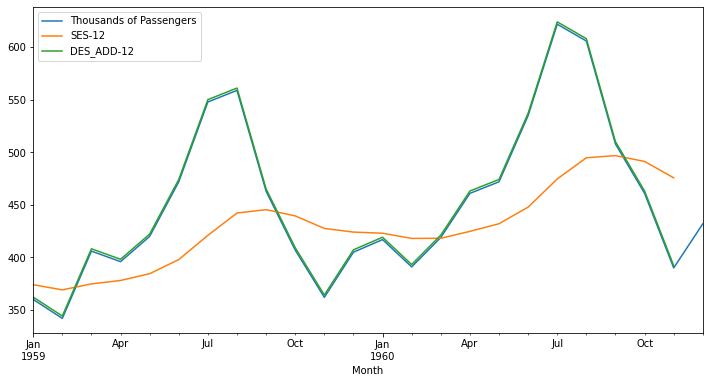

In [20]:
df[['Thousands of Passengers', 'SES-12', 'DES_ADD-12']].iloc[-24:].plot(figsize=(12,6))

In [21]:
df['DES_MUL-12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

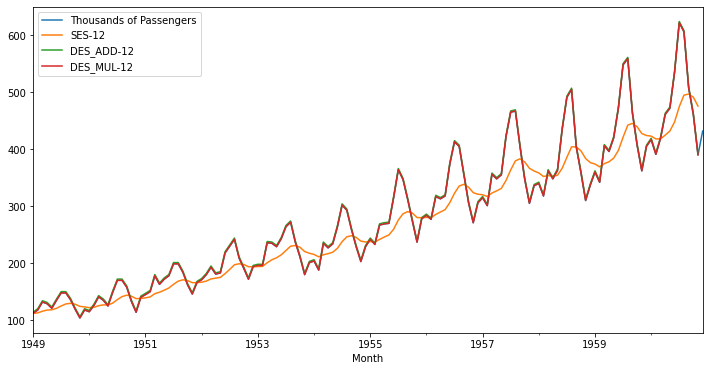

In [22]:
df[['Thousands of Passengers', 'SES-12', 'DES_ADD-12', 'DES_MUL-12']].plot(figsize=(12,6))

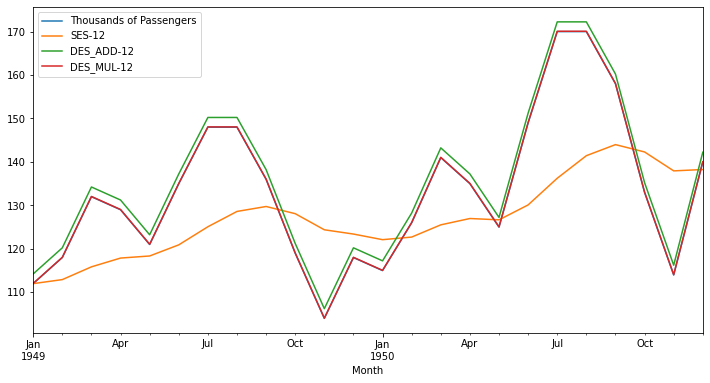

In [23]:
df[['Thousands of Passengers', 'SES-12', 'DES_ADD-12', 'DES_MUL-12']][:24].plot(figsize=(12,6))

In [24]:
df['TES_MUL-12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

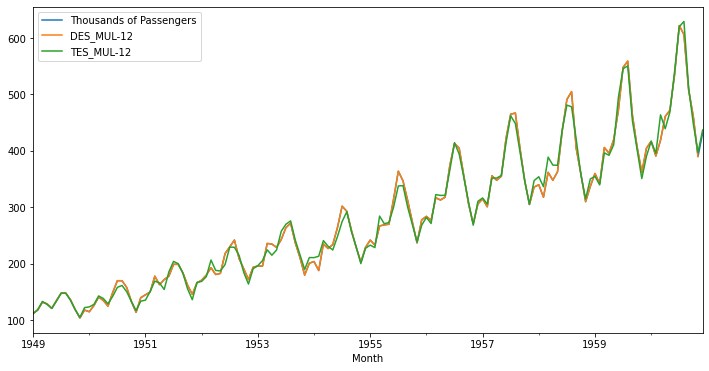

In [25]:
df[['Thousands of Passengers', 'DES_MUL-12', 'TES_MUL-12']].plot(figsize=(12,6))

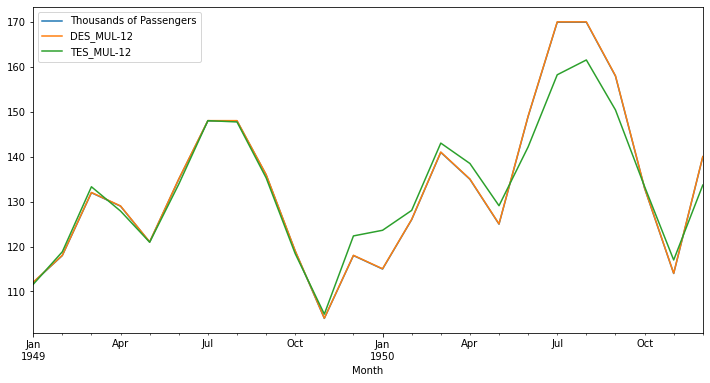

In [26]:
df[['Thousands of Passengers', 'DES_MUL-12', 'TES_MUL-12']].iloc[:24].plot(figsize=(12,6))

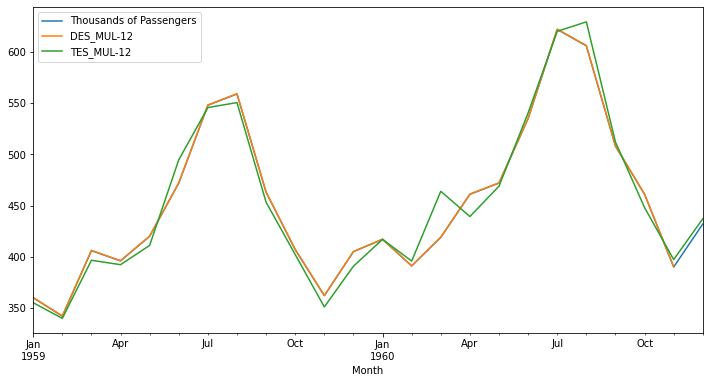

In [27]:
df[['Thousands of Passengers', 'DES_MUL-12', 'TES_MUL-12']].iloc[-24:].plot(figsize=(12,6))